In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo


In [3]:
air_quality=fetch_ucirepo(id=360)

In [4]:
df=air_quality.data.features

In [5]:
features=df[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]


In [6]:
features.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [8]:
n_estimators=100
contamination=0.01
sample_size=256



In [9]:
model=IsolationForest(n_estimators=n_estimators,contamination=contamination,max_features=sample_size,random_state=42)



In [14]:
model.fit(X)
anomaly_labels = model.predict(X)


In [15]:
anomaly_labels

array([1, 1, 1, ..., 1, 1, 1], shape=(9357,))

In [16]:
features['anomaly']=anomaly_labels
features.head()

C:\Users\Chinnu\AppData\Local\Temp\ipykernel_29776\327165233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anomaly']=anomaly_labels


,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [17]:
features.anomaly.value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

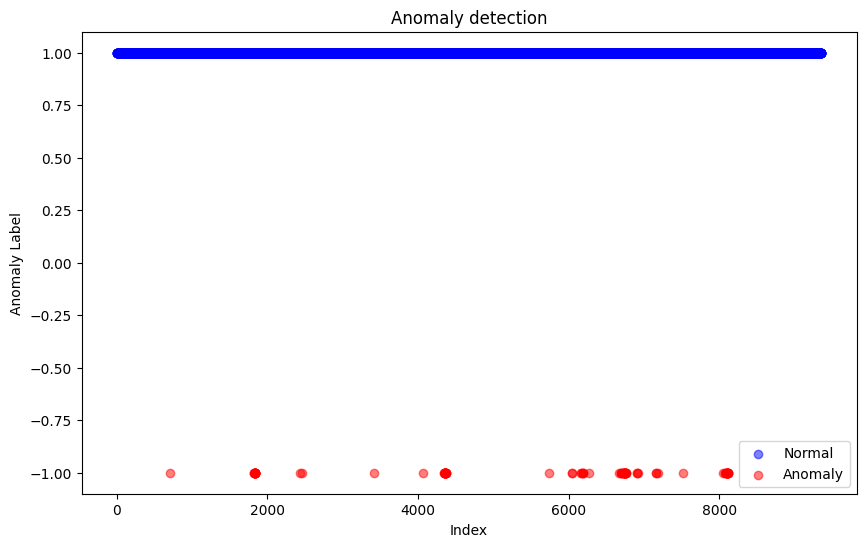

In [18]:
plt.figure(figsize=(10,6))
normal_data=features[features['anomaly']==1]
plt.scatter(normal_data.index,normal_data['anomaly'],color='blue',label='Normal',alpha=0.5)
anomalies=features[features['anomaly']==-1]
anomalies = features[features['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly'],color='red', label='Anomaly', alpha=0.5)
plt.title('Anomaly detection')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()

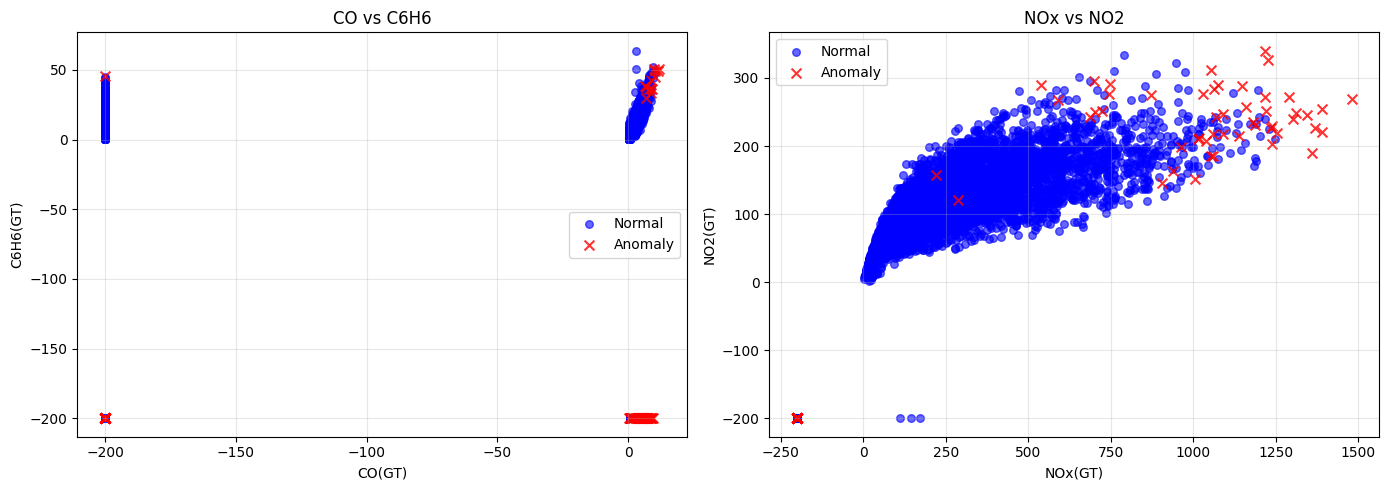

Normal data points: 9263
Anomalies detected: 94


In [19]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")

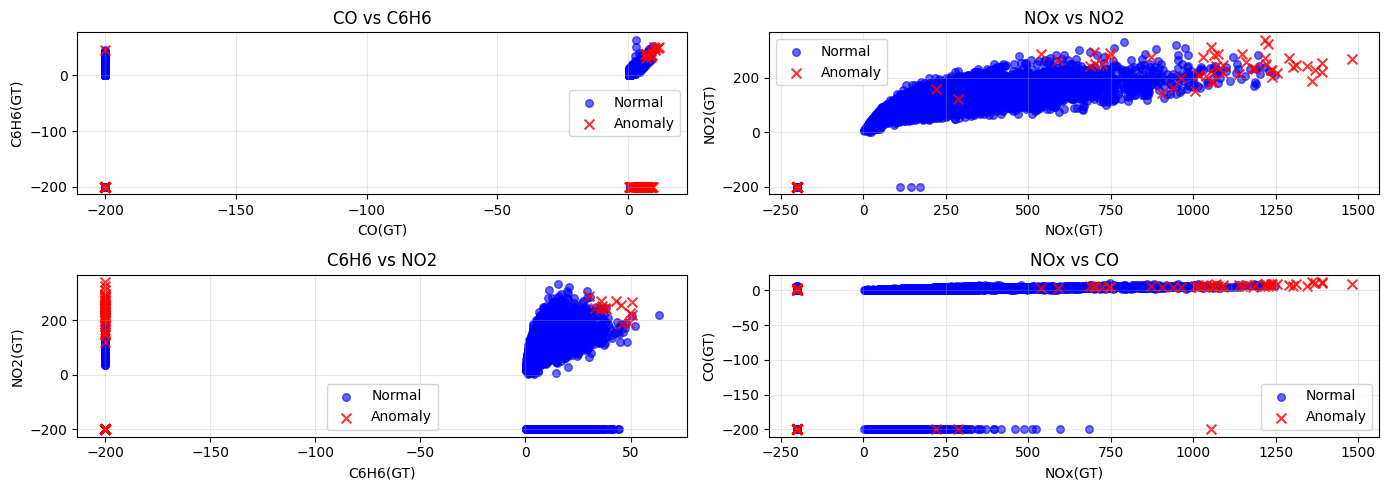

Normal data points: 9263
Anomalies detected: 94


In [20]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(2, 2, figsize=(14, 5))
 
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
# Plot 1: CO vs C6H6
axes[0][0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0][0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0][0].set_xlabel('CO(GT)')
axes[0][0].set_ylabel('C6H6(GT)')
axes[0][0].set_title('CO vs C6H6')
axes[0][0].legend()
axes[0][0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[0][1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0][1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0][1].set_xlabel('NOx(GT)')
axes[0][1].set_ylabel('NO2(GT)')
axes[0][1].set_title('NOx vs NO2')
axes[0][1].legend()
axes[0][1].grid(True, alpha=0.3)

# Plot 2: C6H6 vs NO2
axes[1][0].scatter(normal['C6H6(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1][0].scatter(anomaly['C6H6(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1][0].set_xlabel('C6H6(GT)')
axes[1][0].set_ylabel('NO2(GT)')
axes[1][0].set_title('C6H6 vs NO2')
axes[1][0].legend()
axes[1][0].grid(True, alpha=0.3)

# Plot 2: NOx vs CO
axes[1][1].scatter(normal['NOx(GT)'], normal['CO(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1][1].scatter(anomaly['NOx(GT)'], anomaly['CO(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1][1].set_xlabel('NOx(GT)')
axes[1][1].set_ylabel('CO(GT)')
axes[1][1].set_title('NOx vs CO')
axes[1][1].legend()
axes[1][1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")

In [21]:
import plotly.graph_objects as go
import numpy as np
 
# Separate normal and anomaly
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
fig = go.Figure()
 
# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['CO(GT)'],
    y=normal['C6H6(GT)'],
    z=normal['NOx(GT)'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['NO2(GT)'],   # 4th dimension as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='NO2(GT)')
    )
))
 
# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['CO(GT)'],
    y=anomaly['C6H6(GT)'],
    z=anomaly['NOx(GT)'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly['NO2(GT)'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))
 
# Layout
fig.update_layout(
    title='4D Scatter Plot (Color = NO2(GT))',
    scene=dict(
        xaxis_title='CO(GT)',
        yaxis_title='C6H6(GT)',
        zaxis_title='NOx(GT)'
    ),
    width=900,
    height=700
)
 
fig.show()
 